In [9]:
include("ProyectoFinal.jl")

Energia_3 (generic function with 1 method)

## Sistema Sol - Tierra - Luna

Para el sistema de 3 cuerpos formado por el Sol, la Tierra y la Luna, consideramos una posición inicial colineal, con las distancias equivalentes a las distancias astronómicas reportadas.

Usamos también datos concernientes a las masas.

In [2]:
MasaSol = 100.
MasaTierra = 0.0003015
MasaLuna = 0.00000037

Distancia_TierraSol = 10
Distancia_TierraLuna = 0.02577181
Distancia_LunaSol_inicial= Distancia_TierraSol + Distancia_TierraLuna

VelocidadTraslacional_TierraSol = 0.0072
VelocidadTraslacional_TierraLuna = 7e-8
VelocidadLuna_inicial = VelocidadTraslacional_TierraSol + VelocidadTraslacional_TierraLuna

0.007200069999999999

In [13]:
#Condiciones Iniciales

CondicionesSol    = [MasaSol,     0.,                  0.,   0., 0.,                                 0.2, 0. ]
CondicionesTierra = [MasaTierra,  Distancia_TierraSol, 0.,   0., 0., VelocidadTraslacional_TierraSol, 0. ]
CondicionesLuna   = [MasaLuna,    Distancia_LunaSol_inicial, 0., 0., 0., VelocidadLuna_inicial, 0.]

#Agrupamos Todo

CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]

3-element Array{Array{Float64,1},1}:
 [100.0,0.0,0.0,0.0,0.0,0.2,0.0]                          
 [0.0003015,10.0,0.0,0.0,0.0,0.0072,0.0]                  
 [3.7e-7,10.02577181,0.0,0.0,0.0,0.007200069999999999,0.0]

In [14]:
t, Sol, Tierra, Luna = Integrador3(CondicionesIniciales, 5.);

In [15]:
t

194-element Array{Float64,1}:
 0.0     
 0.239197
 0.437974
 0.597956
 0.72669 
 0.830258
 0.913566
 0.980568
 1.03445 
 1.07778 
 1.11262 
 1.14064 
 1.16318 
 ⋮       
 4.07306 
 4.13181 
 4.2022  
 4.28654 
 4.38758 
 4.50959 
 4.60725 
 4.69262 
 4.7733  
 4.85779 
 4.94758 
 5.05112 

In [16]:
PosicionSol = Sol[1]
VelocidadSol = Sol[2]

PosicionTierra = Tierra[1]
VelocidadTierra = Tierra[2]

PosicionLuna = Luna[1]
VelocidadLuna = Luna[2];

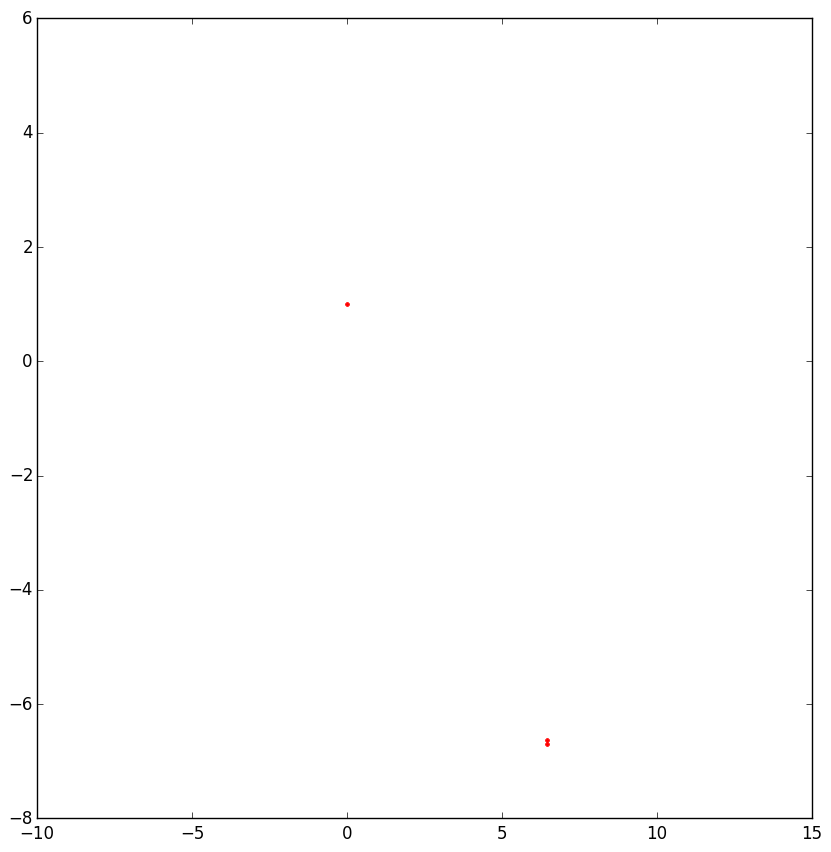

In [17]:
anima3C(Sol, Tierra, Luna, "Sistema2",1)

In [18]:
muestra_animacion("Sistema2")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAZDptZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY0MyA1YzY1NzA0IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAzHZYiEABT//vfHT8Cm6Plmy51FPSEwitj6SCi9WOzQMnUAAAMAAAMAAAMAAAMBXA0eTU9KZyQ0JAAAAwAAuYAHaADgACteH/hHz+AT5fXRncLkmZbOJV5ejYIMGuWU4fCiScDfV6NDO5jjKcZZ10a6VSUJqGiVkc8i5JxHwDzi7/S8+aV7z8m7FjazuHu/a5n6dpDfHOnVBToB1FrqHUrGneYYWVyddeth3MUacrBO0J4gdF/SLiya2rn52Uy+YN4LRmNhPZNxMY/phBXNf4jP0sxGcitwnWnbdK1BRG1uIDuxifYpWmHOy7dG8b7YaA8qPuIBBfWtF97kwk0dj//J9eAxVJCIL9AvVVl+Img0WolK+DR8Z+/jifJuYMR22QzepB2cI1C+WNIe5fWOBrTqybTSdSYSK5ujLyaEt+EHlTtrF/MkgGYYeafL8u+NiVDJ+AX4AGRCOSTqbjxJZvPiWvZyGj2c13LlC+EvWh+Gc99b4YiyF80aPUvOx/3yhh3u+06oJhg+6ynMTBLhUVLoGeO84RgWoKxYfL+gOSdY2MSGLsLyekKnHKYYKMhCBPqOU5vTO1KtxNGrUemHQDhwbo/N0vSI9Zi5fUAQABK1EAMLyfmTkAAACCFjeADVq2AAZ/X0AJcBK43xovnmsV9lDiqZa8s7pCJirxSlWiOF5pZl/5AAMJ+G6/RfvyMwLrHpjlo+krkDVHpVjeNijjJ0UgzvXOi9RToqe9rU43TVzVegjrMiWzL2E1mpoQQZlupMzlDunqcoJobpbxybqNqcKFSdpUXUF/oGprgCJaGR3rEA0VP//05/Jr2QqbAvGK2g/L9B+jrZJ/3owVN2dqnZQk2ab8pT72/+oMx1cAASGJRxUyfY3RLPbtOpcyIe8V2shxTHJgWBBneQ1P//qz0HCagAhggCjAAhu46gAO7UiYAMPMkwAMuwwwAbWlmbcfF8YyPXEZ5Bz0zRY6GLY9U4EK7xwyO/JCsdCFmD4wlNG3gztT8cMWt9lZ0tS5deCHYLXXhWiq7/sjm0i+MEInZv2OufloY3wpukmGA0HRsmLS12gYPJLFGw4p17ZVZtMMYK+AAE+p5oyGbgq/VeHmIxEBqaFtHnBFZxTd9fczxPfBHs1smAAAAQYAAAAwAAAwAAAwAAJhUCzbIlk1cW3JZoV3mGLOxV4vJsAclH2KIkz0gcKtv4uZaxH8J7sw5wEqyD05Ck1wfoNotOY+dLZazwjAKqV5GR3lONVwJ6mxptMrXZXUsWDMfYFXyP9Ocd2jddWfByQ/aZQZZlfcpEnHHiA8tiesEMthMoGYCE9Q0HnkzkwaV+3XTfEzIecIYbvPn390IytJ0h7cWL7q9nx1K9mrAjHuVTMoTUO2oBDTo4DkkqK47FaViaNsxx94IOCsGGvir0dURId9nUcP6h8FReSO2funKcdYQZO9zVyB6WBA8YM4+n6KfnfRPN/1anrBTNMx/L/+7mcyISLWkEA8ciBxg644X2A7K7uA/G/QT8CSf/JeD9+AsjAc7Ln9esUV2xdaTW/3WBCFJW9msE8MGAhU9MmmlCqoziGUh1ynEX6WaYFqgc4ZbEdjmK0+/s1jy4/+X5pv0IAPwyAAADAAADAAADAAAU+WWff37iXaZT62775xbtBh9mWqw8fgalxdThnJqWDnKNy5dF8qjxBFLJ1gLidKaYmRFLdeLuMYVAbQklRxPagmgzJvGu1iJuMESeF6E3Ls4ityoowMndgkMwwaI3g8pn02ZpHrIFrMlDrk2pXKQ+c//904EsWUeXZeeQyN7knfT6wJBXe9/lfRKJSAj93gfS54iXUB1/PpKEy6udxX6ZesAw/nKoiCJZ19oa5jWKyLGFMBQQ9GAa3f7Y3mHg78HWG5tFi9X39SQVu3SKfn6lRnwchmFZawa7psp3fyYAAAtWOo3VT3Y4EAAAAwAAAwAAAwAAAwAAIn0hHn66XPlZS+2mlYYoa3cdYq0JNO/p1rT+BGTPkc6rZJojjrNl06krrrl3iOWIIjQIHWm/rsGKKcQFtFUxrsvi9TR52kMQQ9N7Pbzb2KC3ybMKB0m/3nGzVm8lTtaQwqdHNL3sClNFi08knlxpdNIR9A+mykq0rwPrK3zETNs1bAQPjJB9FcJNDKcQWIVOdWke2xJJMEylvmzsTkfjUEPDWNpZzmulF2kTWPIs6MXqJL0UsQHInXf2DBI6leRGXaFpF8BGjSKRT/yr/X+ppbAAAAMAAAMAAAMAAAMAAUi0lw2Y1YfiH+vTvnmgeN49/uTQK2O5Tc1/gXAvQZC1giHYrXgWODlVftfe90XlbvrFRAmjcUmIz6RV2296aiCgtRzmkfdHPOA8QANSLm8lLvPcmUki++3ZT4r85MF4WmqhnI5/jWSJCSiPZCj6M4NId6DJhCQsJc2e/anVSG23Skn9QzgOqBXCgK4ex+MZJdSvie9ytN88E4hkoKIjPk2Wa5N7b2yLXvj4d9hSazPm4JxSkILArgEQ2OtBI6L0gBG+7K7XtBHRcHzHdoLvWenBSy/cL506W6w8ppnbddoajKeufccuImp/7X/8AAADAAADAAADAAADAAADA0Vsi5MbhtJo9UilHXMPu8H0y83iS4Gz5ztMDQCHg3B7lAXmPKzx+PmtzCqgkkz7HMfF+47oj9R0bnVvHdgnkYpDAd9Y07L7ZrLwvfFmd4KX/3GIxAzctbKD3pSOEraKVGY0WcTeo2rHnNayqyUjXbjMaROAWAbU9yAKl9kMeL+oAcn9s1z5RS8duLrigQjI5CiOLl0w9VEi05760J4Mtg/v+g5AJfu81aru7aPNDnNy03TNVS7BL9tFhTlD9C+aSYgAn09DbPFiGPELi+24h4L9MMDcOyulryW4gcOlukZCrP+AGJiPrAt4Dp5Fz2wnFGp4oQ1Nj6jcr8Qpa1PfxWMvtH4cVR8SSFGAZswNpsDM9Id/WiaQFvcLtX6iMFH5C8F